# Stretching and uniformization

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import synthia as syn

Matplotlib is building the font cache; this may take a moment.


## Define plotting function

In [2]:
def plot_profiles(ds, var_name, n_profiles=100):
    _, ax = plt.subplots(figsize=(6, 4))
    for column in np.random.choice(ds.column, n_profiles):
        ds[var_name].sel(column=column).plot(ax=ax, c='#332288', alpha=0.15)
    ax.set_ylabel('Air temperature in K')
    ax.set_xlabel('Atmospheric level')

## Plot source data

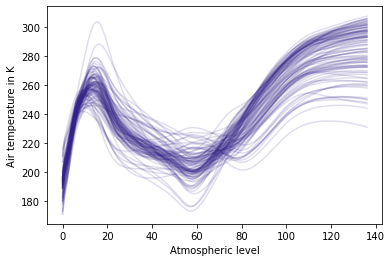

In [3]:
ds_true = syn.util.load_dataset(name='SAF-Synthetic')
plot_profiles(ds_true, 'temperature_fl')

## Fit copula to data

In [4]:
parameterizer = syn.QuantileParameterizer(n_quantiles=100)
generator = syn.CopulaDataGenerator()
generator.fit(ds_true, copula=syn.GaussianCopula(), parameterize_by=parameterizer)

## Generate 'streatched' samples

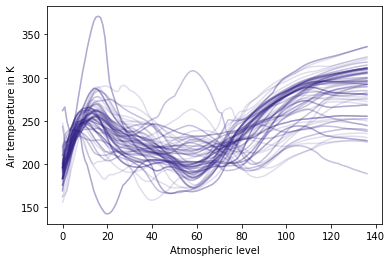

In [5]:
N_SAMPLES = 100
ds_synthetic = generator.generate(n_samples=N_SAMPLES, uniformization_ratio=0, stretch_factor=2)
plot_profiles(ds_synthetic, 'temperature_fl')

## Generate 'more uniformly distributed' samples

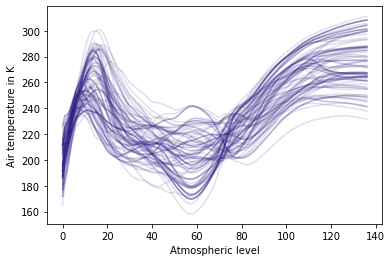

In [6]:
N_SAMPLES = 100
ds_synthetic = generator.generate(n_samples=N_SAMPLES, uniformization_ratio=0.5, stretch_factor=1)
plot_profiles(ds_synthetic, 'temperature_fl')